## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [87]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [14]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("./Resources/bitstamp.csv"),index_col = "Timestamp",parse_dates = True, infer_datetime_format = True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [15]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [12]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"),index_col = "Timestamp", parse_dates = True, infer_datetime_format = True )

In [13]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [47]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna().copy()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [31]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"] = bitstamp["Close"].str.replace("$","")

C:\Users\EY332FH\AppData\Local\Temp\ipykernel_21880\3343096856.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp["Close"] = bitstamp["Close"].str.replace("$","")


### Step 3: Convert the data type of the Close column to a `float`.

In [34]:
# Convert the Close data type to a float
bitstamp["Close"] = bitstamp["Close"].astype("float")

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [58]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.drop_duplicates().copy()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [46]:
coinbase.dropna().copy()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [50]:
coinbase["Close"] = coinbase["Close"].str.replace("$","")

C:\Users\EY332FH\AppData\Local\Temp\ipykernel_21880\3799985578.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase["Close"] = coinbase["Close"].str.replace("$","")


In [59]:
coinbase["Close"] = coinbase["Close"].astype("float")

In [61]:
coinbase.drop_duplicates().copy()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [78]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,["Close"]]
# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [80]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,["Close"]]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [81]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [82]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

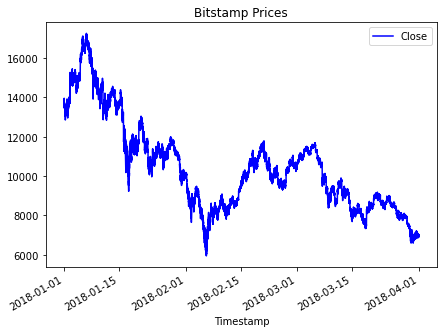

In [93]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize = (7,5), color = "blue", title = "Bitstamp Prices")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

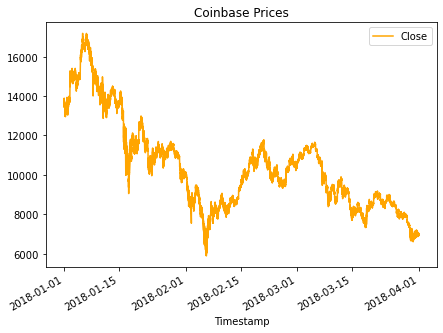

In [92]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize = (7,5), color = "orange", title = "Coinbase Prices")

<AxesSubplot:title={'center':'Bitstamp v Coinbase Prices'}, xlabel='Timestamp'>

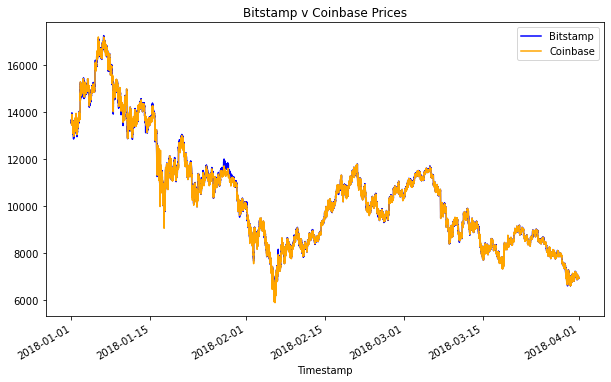

In [96]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced["Close"].plot(legend = True, figsize = (10,6), color = "blue", title = "Bitstamp v Coinbase Prices",label = "Bitstamp")
coinbase_sliced["Close"].plot(legend = True, figsize = (10,6), color = "orange", label = "Coinbase")


<AxesSubplot:title={'center':'Exchange Comparison (Earlier Time Period)'}, xlabel='Timestamp'>

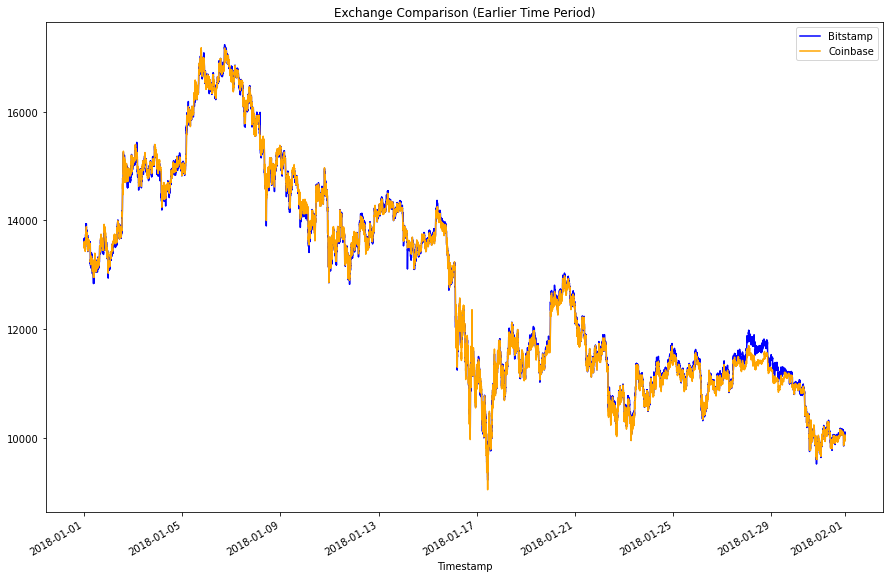

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE

<AxesSubplot:title={'center':'Bitstamp v Coinbase Prices - one month period'}, xlabel='Timestamp'>

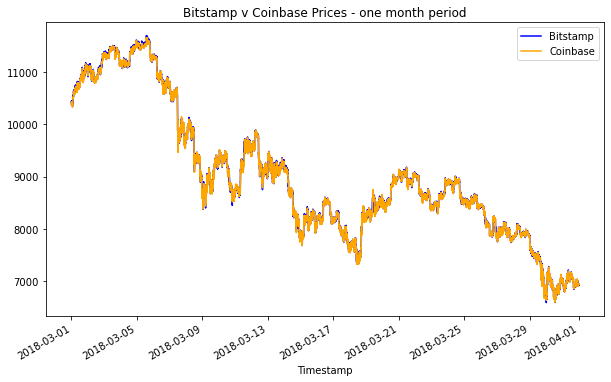

In [97]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced["Close"].loc["2018-03-01":"2018-04-01"].plot(legend = True, figsize = (10,6), color = "blue", title = "Bitstamp v Coinbase Prices - one month period",label = "Bitstamp")
coinbase_sliced["Close"].loc["2018-03-01":"2018-04-01"].plot(legend = True, figsize = (10,6), color = "orange", label = "Coinbase")


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** NO

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v Coinbase Prices - January 16th, 2018'}, xlabel='Timestamp'>

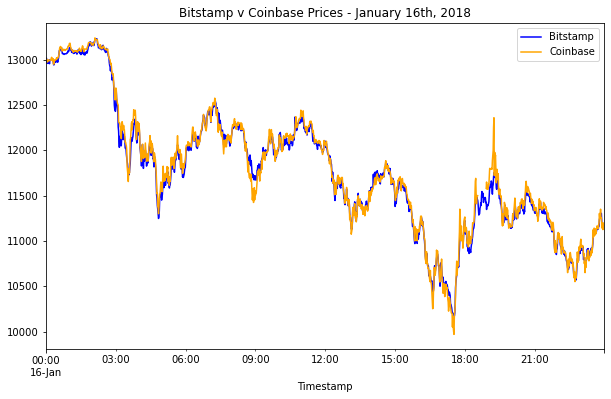

In [108]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc["2018-01-16":"2018-01-16"].plot(legend = True, figsize = (10,6), color = "blue", title = "Bitstamp v Coinbase Prices - January 16th, 2018",label = "Bitstamp")
coinbase_sliced["Close"].loc["2018-01-16":"2018-01-16"].plot(legend = True, figsize = (10,6), color = "orange", label = "Coinbase")

In [99]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced["Close"].loc["2018-01-16":"2018-01-16"]-coinbase_sliced["Close"].loc["2018-01-16":"2018-01-16"]

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean      -23.212135
std        67.789186
min      -606.800000
25%       -52.355000
50%       -22.280000
75%         8.330000
max       275.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - early'}>

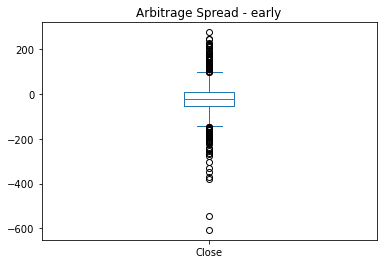

In [101]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind= "box",title="Arbitrage Spread - early")

<AxesSubplot:title={'center':'Bitstamp v Coinbase Prices - February 24th 2018'}, xlabel='Timestamp'>

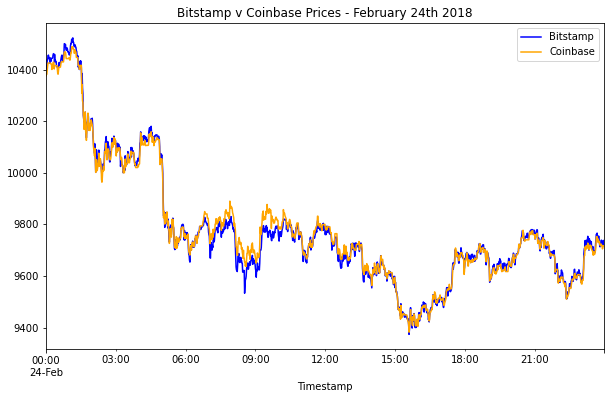

In [109]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc["2018-02-24":"2018-02-24"].plot(legend = True, figsize = (10,6), color = "blue", title = "Bitstamp v Coinbase Prices - February 24th 2018",label = "Bitstamp")
coinbase_sliced["Close"].loc["2018-02-24":"2018-02-24"].plot(legend = True, figsize = (10,6), color = "orange", label = "Coinbase")

In [110]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced["Close"].loc["2018-02-24":"2018-02-24"]-coinbase_sliced["Close"].loc["2018-02-24":"2018-02-24"]

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1437.000000
mean       -3.396131
std        22.969472
min      -121.320000
25%       -12.120000
50%         0.010000
75%        10.590000
max        50.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - middle'}>

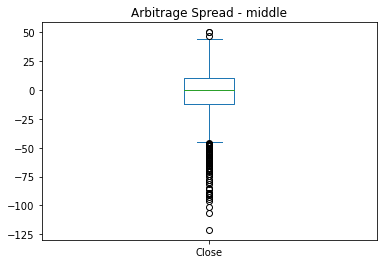

In [111]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind= "box",title="Arbitrage Spread - middle")

<AxesSubplot:title={'center':'Bitstamp v Coinbase Prices - March 28th 2018'}, xlabel='Timestamp'>

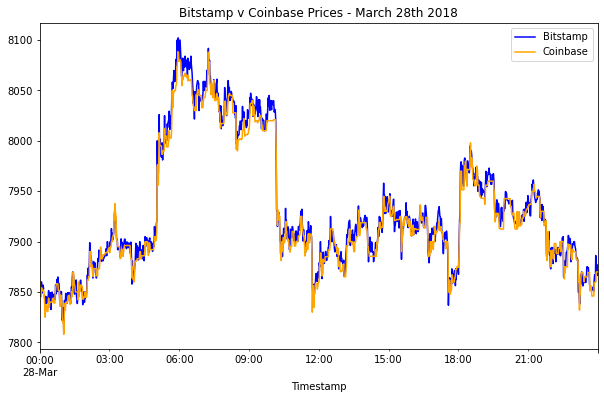

In [112]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced["Close"].loc["2018-03-28":"2018-03-28"].plot(legend = True, figsize = (10,6), color = "blue", title = "Bitstamp v Coinbase Prices - March 28th 2018",label = "Bitstamp")
coinbase_sliced["Close"].loc["2018-03-28":"2018-03-28"].plot(legend = True, figsize = (10,6), color = "orange", label = "Coinbase")

In [113]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced["Close"].loc["2018-03-28":"2018-03-28"] - coinbase_sliced["Close"].loc["2018-03-28":"2018-03-28"]

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'arbitrage spread - late day'}>

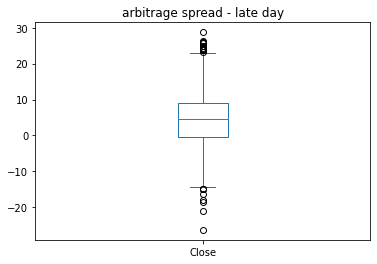

In [115]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", title = "arbitrage spread - late day")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [122]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp_sliced["Close"].loc["2018-01-16":"2018-01-16"]-coinbase_sliced["Close"].loc["2018-01-16":"2018-01-16"]


# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early_profitable = arbitrage_spread_early[arbitrage_spread_early > 0]
arbitrage_spread_early_profitable.describe()

count    451.000000
mean      40.645477
std       47.387457
min        0.010000
25%       10.010000
50%       26.830000
75%       49.330000
max      275.920000
Name: Close, dtype: float64

In [126]:
#Middle date
#profit calculation
arbitrage_spread_middle = bitstamp_sliced["Close"].loc["2018-02-24":"2018-02-24"]-coinbase_sliced["Close"].loc["2018-02-24":"2018-02-24"]

#description of profitable spreads
arbitrage_spread_middle_profitable = arbitrage_spread_middle[arbitrage_spread_middle > 0]
arbitrage_spread_middle_profitable.describe()



count    719.000000
mean      12.926912
std        9.672629
min        0.010000
25%        5.335000
50%       10.590000
75%       18.245000
max       50.180000
Name: Close, dtype: float64

In [127]:
#Late date
#profit calculation
arbitrage_spread_late = bitstamp_sliced["Close"].loc["2018-03-28":"2018-03-28"]-coinbase_sliced["Close"].loc["2018-03-28":"2018-03-28"]

#description of profitable spreads
arbitrage_spread_late_profitable = arbitrage_spread_late[arbitrage_spread_late > 0]
arbitrage_spread_late_profitable.describe()

count    1028.000000
mean        7.853317
std         5.521699
min         0.010000
25%         3.710000
50%         6.880000
75%        10.712500
max        28.730000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [135]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early_profitable[arbitrage_spread_early_profitable > 0]/coinbase_sliced["Close"].loc["2018-01-16":"2018-01-16"]

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-16 00:00:00    0.000694
2018-01-16 00:01:00    0.000640
2018-01-16 00:02:00         NaN
2018-01-16 00:03:00         NaN
2018-01-16 00:04:00         NaN
                         ...   
2018-01-16 23:55:00         NaN
2018-01-16 23:56:00    0.004115
2018-01-16 23:57:00         NaN
2018-01-16 23:58:00    0.004049
2018-01-16 23:59:00    0.004565
Name: Close, Length: 1440, dtype: float64

In [136]:
#middle date
spread_return_middle= arbitrage_spread_middle_profitable[arbitrage_spread_middle_profitable > 0]/coinbase_sliced["Close"].loc["2018-02-24":"2018-02-24"]

# Review the spread return DataFrame
spread_return_middle

Timestamp
2018-02-24 00:00:00    0.002313
2018-02-24 00:01:00    0.002897
2018-02-24 00:02:00    0.002851
2018-02-24 00:03:00    0.003819
2018-02-24 00:04:00    0.002383
                         ...   
2018-02-24 23:55:00    0.001546
2018-02-24 23:56:00    0.000717
2018-02-24 23:57:00    0.002129
2018-02-24 23:58:00    0.000763
2018-02-24 23:59:00    0.001370
Name: Close, Length: 1440, dtype: float64

In [140]:
#late date
spread_return_late= arbitrage_spread_late_profitable[arbitrage_spread_late_profitable > 0]/coinbase_sliced["Close"].loc["2018-03-28":"2018-03-28"]

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
                         ...   
2018-03-28 23:55:00    0.000205
2018-03-28 23:56:00    0.000203
2018-03-28 23:57:00    0.000103
2018-03-28 23:58:00    0.000883
2018-03-28 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [141]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 07:39:00    0.010341
2018-01-16 08:43:00    0.013533
2018-01-16 08:44:00    0.013085
2018-01-16 08:45:00    0.013013
2018-01-16 08:46:00    0.017702
Name: Close, dtype: float64

In [142]:
#middle date
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [143]:
#middle date
profitable_trades_late = spread_return_middle[spread_return_middle>.01]
# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [125]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    36.000000
mean      0.015715
std       0.003830
min       0.010341
25%       0.012960
50%       0.014925
75%       0.018038
max       0.024152
Name: Close, dtype: float64

In [133]:
#middle date
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [134]:
#late date
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [145]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced["Close"].loc["2018-01-16":"2018-01-16"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-16 07:39:00    124.56
2018-01-16 08:43:00    158.91
2018-01-16 08:44:00    153.10
2018-01-16 08:45:00    152.18
2018-01-16 08:46:00    207.82
2018-01-16 08:47:00    214.26
2018-01-16 08:48:00    170.03
2018-01-16 08:49:00    155.02
2018-01-16 08:50:00    190.45
2018-01-16 08:51:00    229.71
2018-01-16 08:52:00    247.04
2018-01-16 08:53:00    219.35
2018-01-16 08:54:00    160.96
2018-01-16 08:55:00    275.92
2018-01-16 08:56:00    192.98
2018-01-16 08:57:00    131.17
2018-01-16 08:58:00    222.15
2018-01-16 08:59:00    163.98
2018-01-16 09:00:00    192.00
2018-01-16 09:01:00    121.33
2018-01-16 09:02:00    142.52
2018-01-16 09:04:00    135.86
2018-01-16 14:04:00    134.66
2018-01-16 16:35:00    138.26
2018-01-16 16:36:00    170.86
2018-01-16 16:37:00    247.61
2018-01-16 16:38:00    179.66
2018-01-16 17:04:00    177.97
2018-01-16 17:08:00    114.32
2018-01-16 17:09:00    110.00
2018-01-16 17:17:00    132.19
2018-01-16 17:18:00    183.43
2018-01-16 17:28:00    149.99


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [146]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     36.000000
mean     174.062222
std       41.263561
min      110.000000
25%      141.455000
50%      167.005000
75%      201.947500
max      275.920000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early'}, xlabel='Timestamp'>

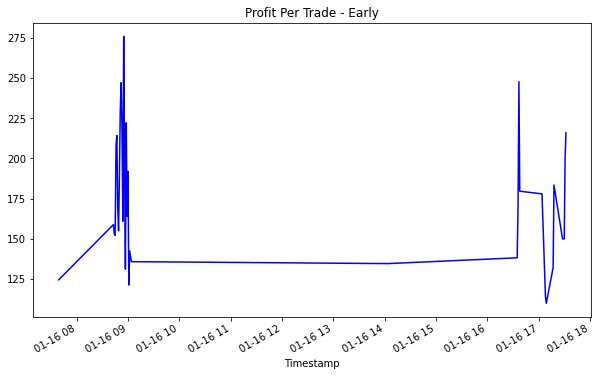

In [147]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title = "Profit Per Trade - Early", figsize = (10,6), color = "blue")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [148]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_per_trade_early.sum()
profit_sum

6266.24

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [149]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Profit Per Trade - Early'}, xlabel='Timestamp'>

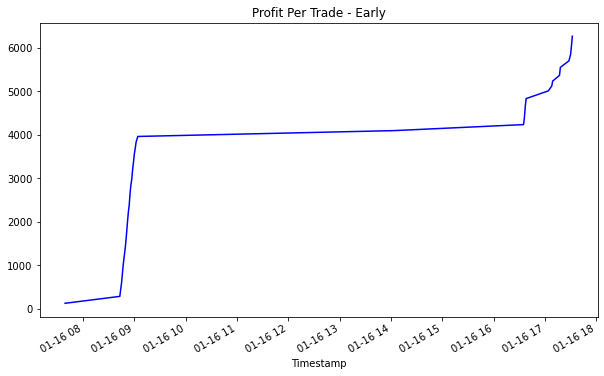

In [150]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title = "Profit Per Trade - Early", figsize = (10,6), color = "blue") 

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Only the early date had profitable trade opportunities. 